# TASK 2

FACE MASK DETECTION

In [2]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
with_mask=(r"E:\Sync Intern\archive\data\with_mask")
without_mask=(r"E:\Sync Intern\archive\data\without_mask")
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       3725
without_mask    3828

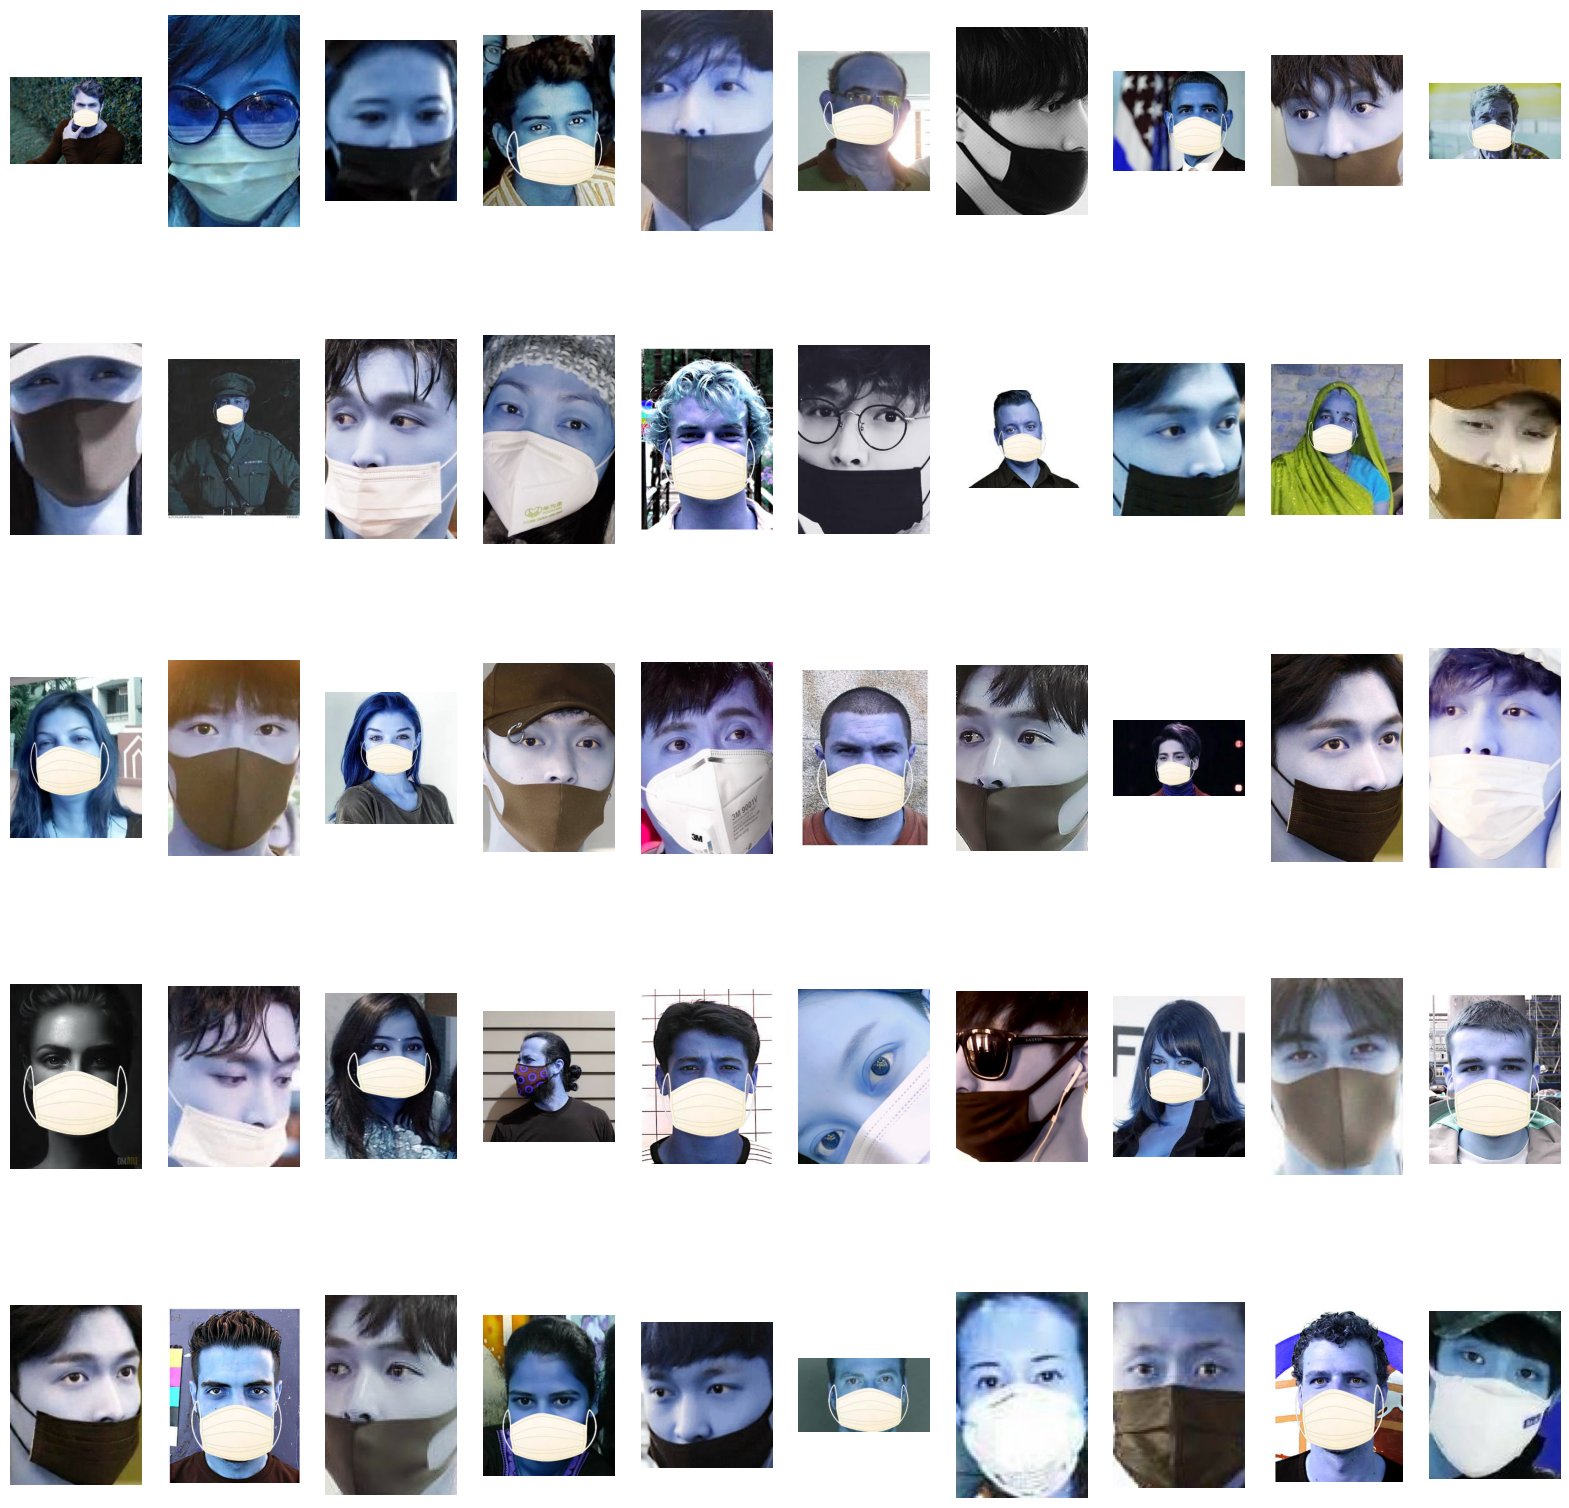

In [4]:
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

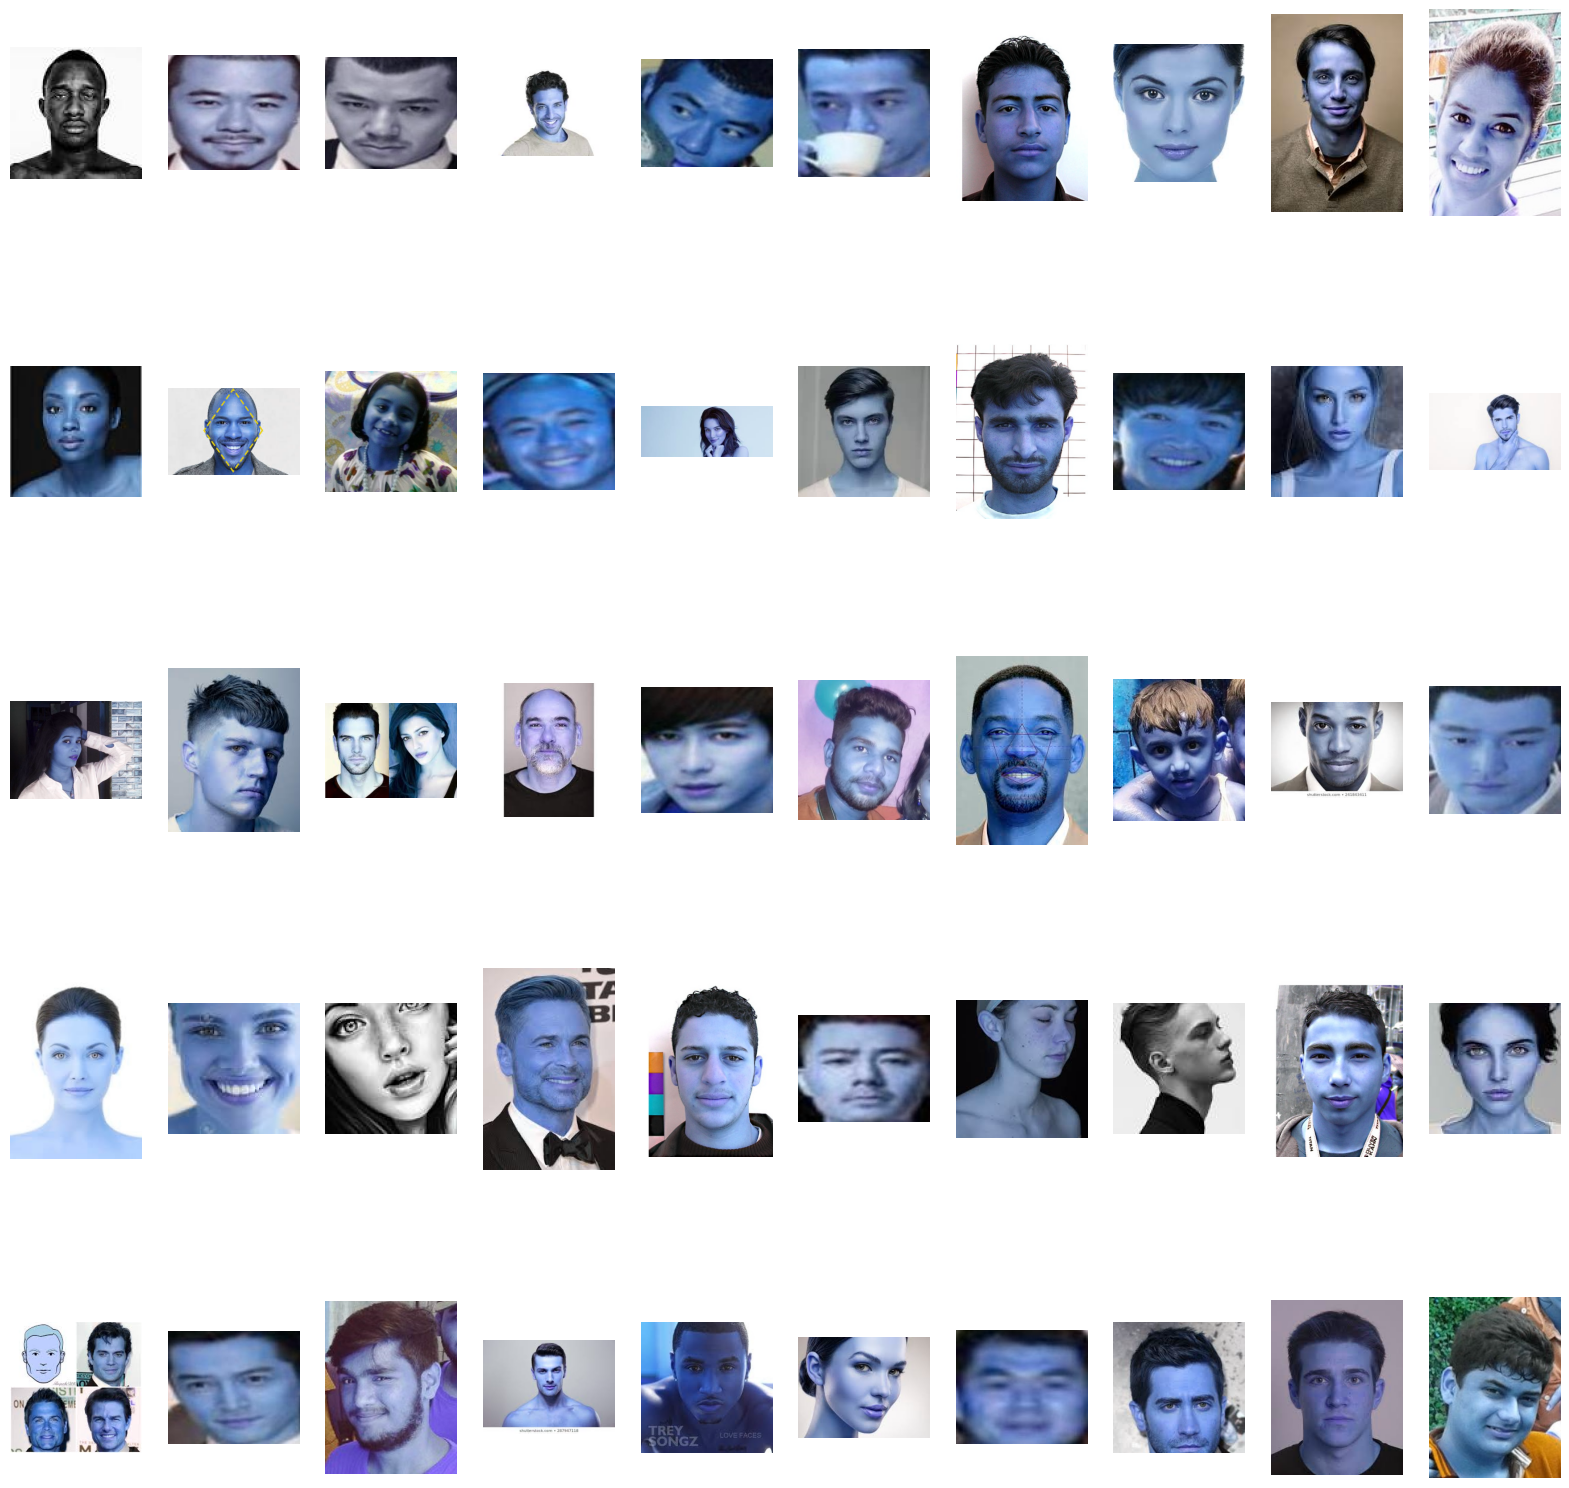

In [5]:
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [6]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [7]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])   

Number
(225, 225, 3)     664
(428, 320, 3)     381
(275, 183, 3)     255
(100, 100, 3)     207
(183, 275, 3)     181
...               ...
(192, 127, 3)       1
(218, 218, 3)       1
(422, 759, 3)       1
(413, 600, 3)       1
(135, 156, 3)       1

[2692 rows x 1 columns]

In [8]:
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [9]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (6420, 128, 128, 3)
X Test Shape is : (1133, 128, 128, 3)
Y Train Shape is : (6420,)
Y Test Shape is : (1133,)


In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.1)

Epoch 1/10
181/181 [==============================] - 127s 662ms/step - loss: 2.0984 - accuracy: 0.6457 - val_loss: 0.5654 - val_accuracy: 0.7025
Epoch 2/10
181/181 [==============================] - 116s 642ms/step - loss: 0.5675 - accuracy: 0.7106 - val_loss: 0.7096 - val_accuracy: 0.6978
Epoch 3/10
181/181 [==============================] - 128s 706ms/step - loss: 0.5369 - accuracy: 0.7475 - val_loss: 0.4980 - val_accuracy: 0.7866
Epoch 4/10
181/181 [==============================] - 126s 696ms/step - loss: 0.4794 - accuracy: 0.7861 - val_loss: 0.4812 - val_accuracy: 0.8162
Epoch 5/10
181/181 [==============================] - 123s 680ms/step - loss: 0.4125 - accuracy: 0.8302 - val_loss: 0.3936 - val_accuracy: 0.8255
Epoch 6/10
181/181 [==============================] - 110s 606ms/step - loss: 0.3666 - accuracy: 0.8579 - val_loss: 0.4926 - val_accuracy: 0.8193
Epoch 7/10
181/181 [==============================] - 78s 431ms/step - loss: 0.3159 - accuracy: 0.8726 - val_loss: 0.4601 - 

In [12]:
hist=pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0  2.098422  0.645725  0.565440      0.702492
1  0.567476  0.710627  0.709555      0.697819
2  0.536867  0.747490  0.497999      0.786604
3  0.479442  0.786085  0.481225      0.816199
4  0.412530  0.830218  0.393588      0.825545
5  0.366610  0.857909  0.492597      0.819315
6  0.315904  0.872620  0.460111      0.816199
7  0.274793  0.890620  0.305161      0.890966
8  0.202671  0.921253  0.261407      0.894081
9  0.161988  0.937349  0.243465      0.923676

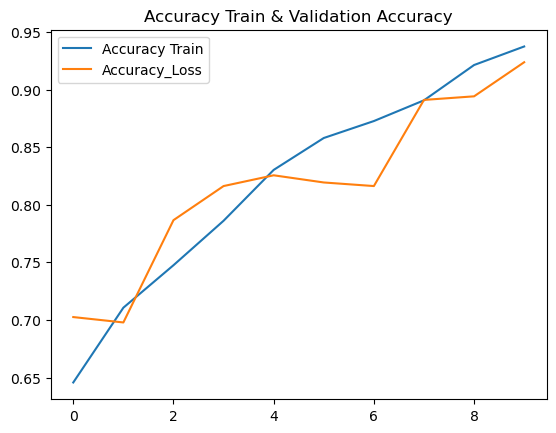

In [13]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

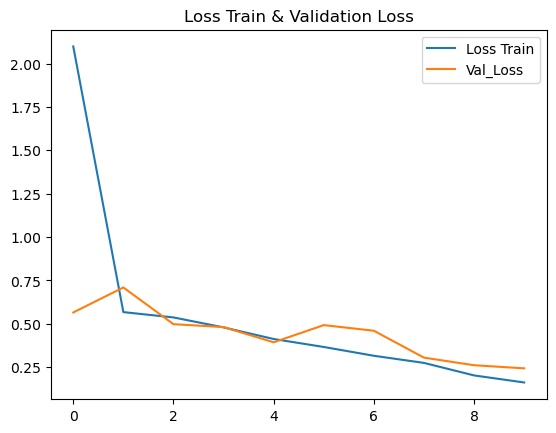

In [14]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [15]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)


36/36 [==============================] - 4s 115ms/step - loss: 0.2643 - accuracy: 0.9188
Test Loss = 0.26433196663856506
Test Accuracy = 0.918799638748169


In [16]:
prediction = model.predict(X_test)
prediction

36/36 [==============================] - 4s 89ms/step


array([[9.9181670e-01, 8.1832642e-03],
       [9.9359787e-01, 6.4021684e-03],
       [4.4770602e-02, 9.5522940e-01],
       ...,
       [9.4027755e-06, 9.9999058e-01],
       [4.5313510e-01, 5.4686481e-01],
       [1.1022919e-03, 9.9889767e-01]], dtype=float32)

In [17]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

Prediction
0     without mask
1     without mask
2        with mask
3     without mask
4        with mask
...            ...
1128  without mask
1129     with mask
1130     with mask
1131     with mask
1132     with mask

[1133 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

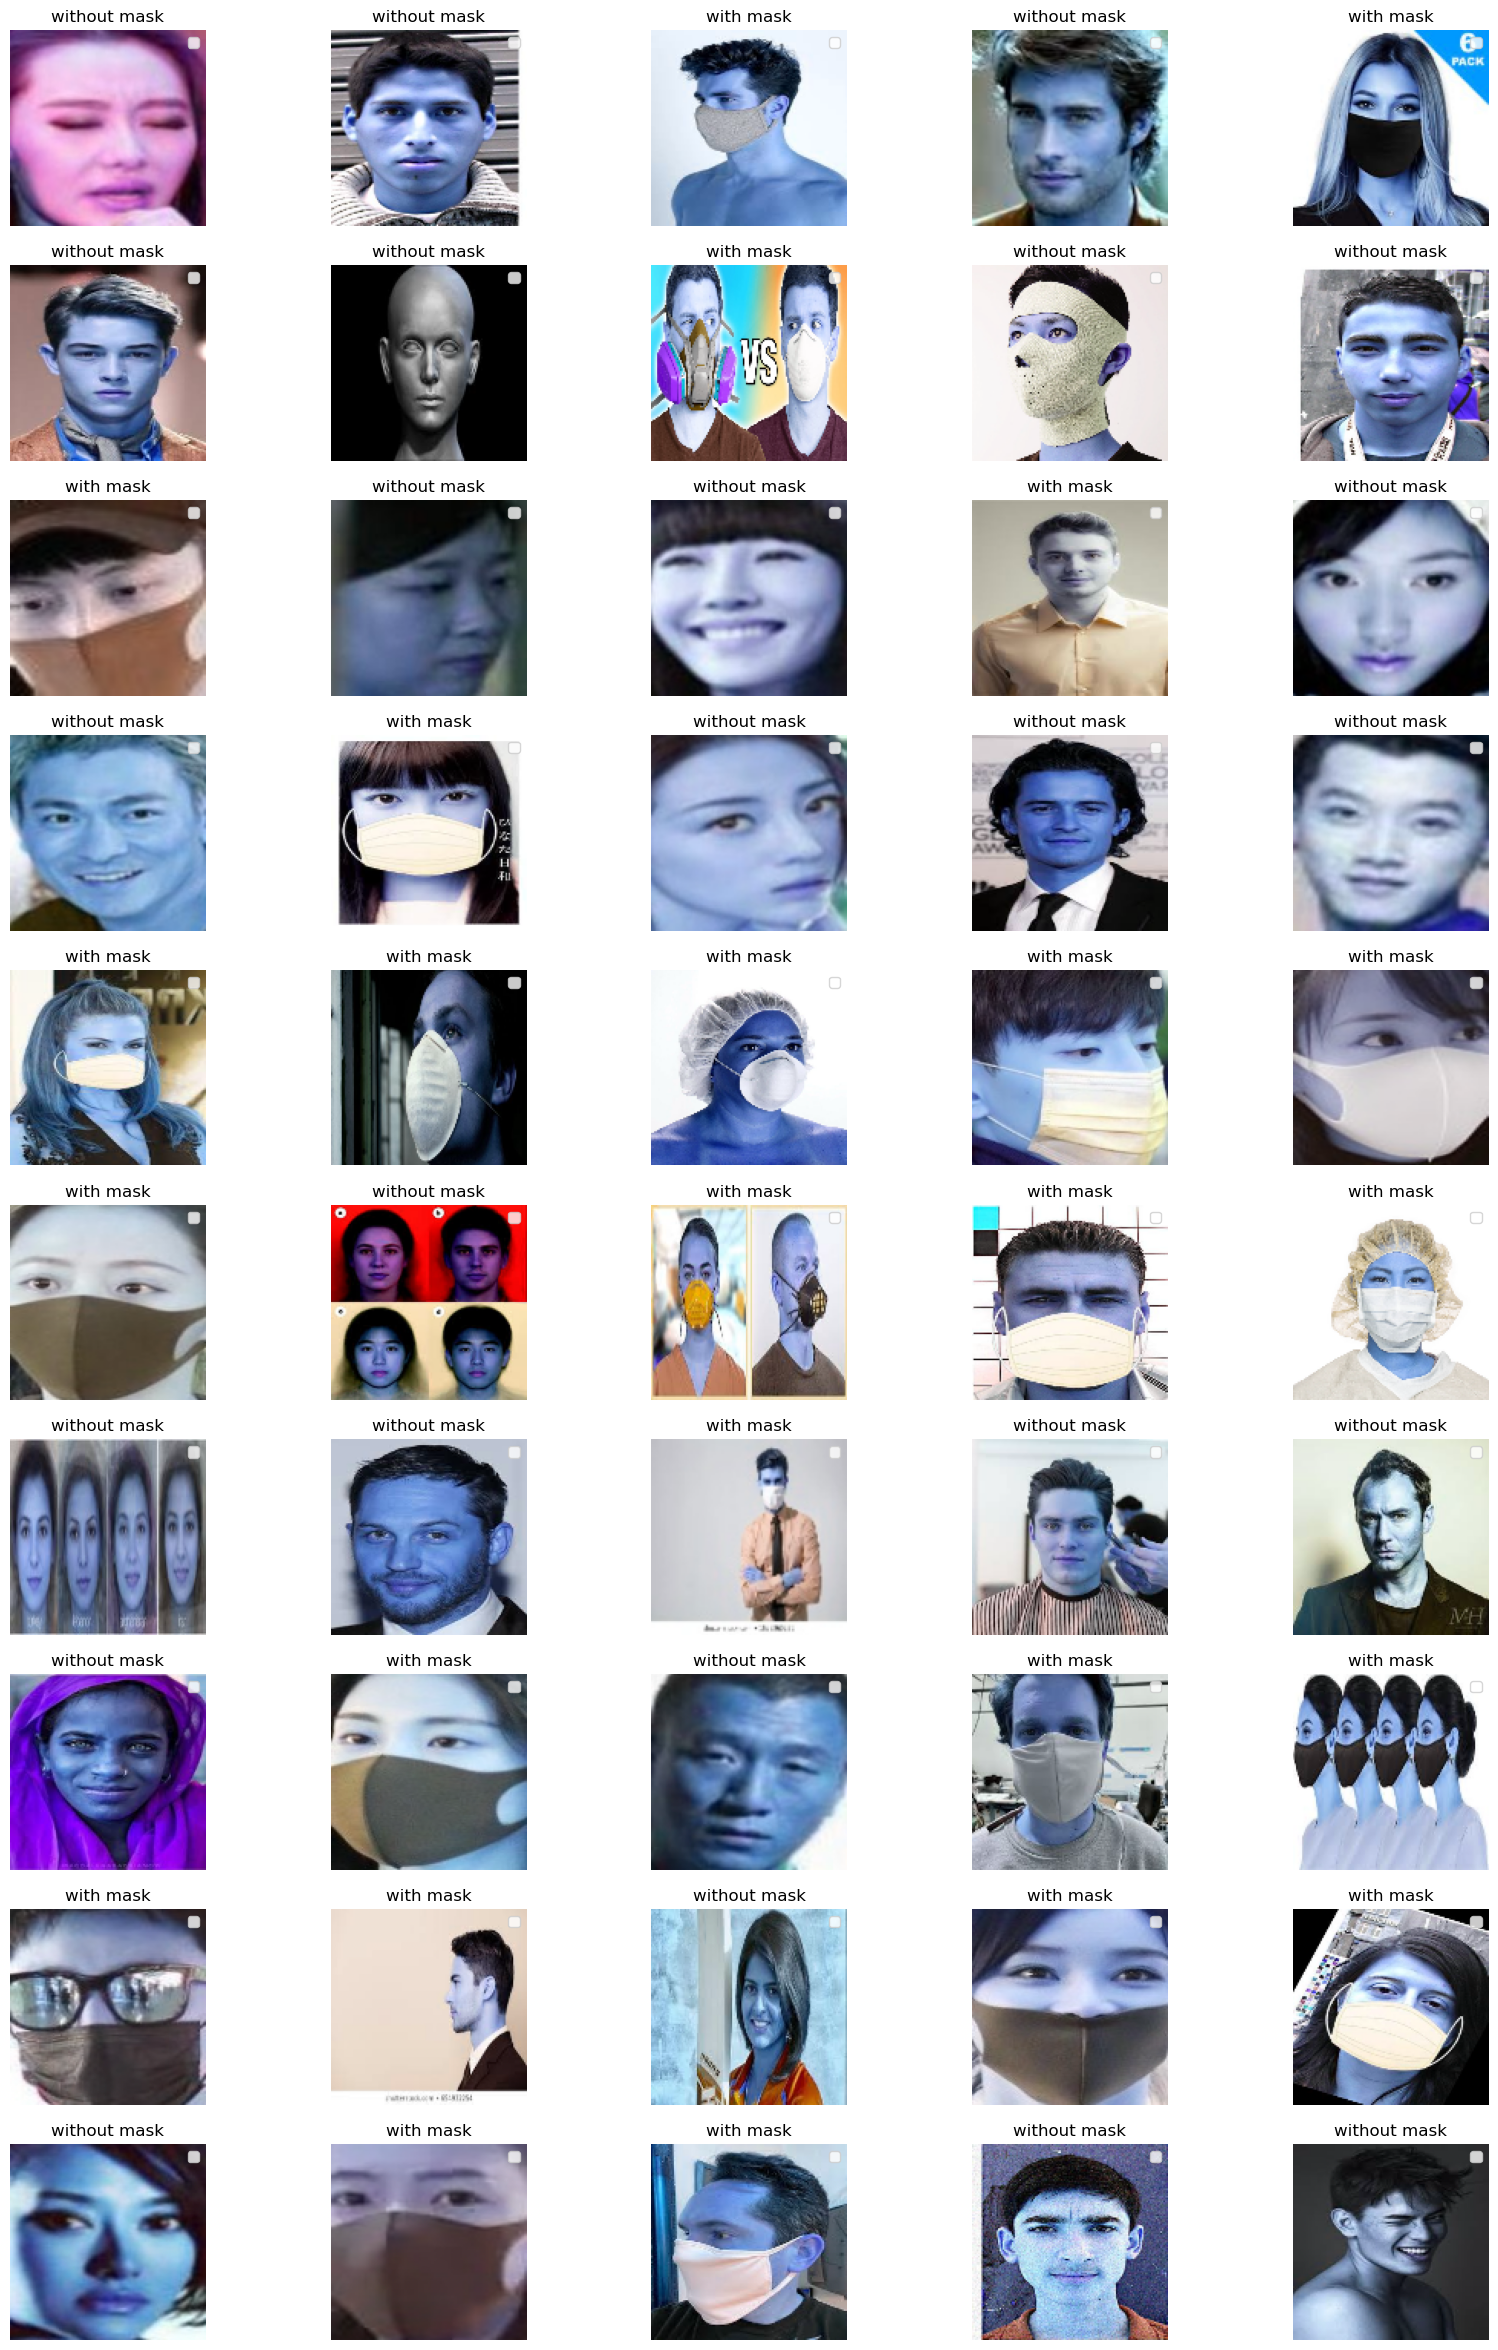

In [23]:

plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')
    
